#📌 Extracão

### Importação das Bibliotecas

In [33]:
import pandas as pd

In [34]:
import requests

In [35]:
import json

In [36]:
import numpy as np

### Carregando base de dados

In [37]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [38]:
response = requests.get(url)
dados = response.json()

In [39]:
dados_normalizados = pd.json_normalize(dados)
dados_normalizados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

### Conhecendo o Dataset - Exploração dos dados



In [40]:
dados_df = pd.DataFrame(dados_normalizados)
dados_df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [41]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [42]:
dados_df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [43]:
dados_df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


### Alterar nomes de Colunas

In [44]:
dados_df.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelou',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_conjuge',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'tempo_contrato_meses',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'forma_pagamento',
    'account.Charges.Monthly': 'mensalidade',
    'account.Charges.Total': 'gasto_total'
}, inplace=True)


## Deletar valores vazios ' '
### A coluna "cancelou" possui valores vazios
Vamos alterar esse detalhe e deletar linhas que possuem valores vazios

In [45]:
dados_df['cancelou'].unique()

array(['No', 'Yes', ''], dtype=object)

In [46]:
print(dados_df[dados_df['cancelou'] == ''].shape[0])

224


Vou transformar os dados vazios em nulos, e depois deletá-los

In [47]:
dados_df['cancelou'] = dados_df['cancelou'].replace('', np.nan)

In [48]:
dados_df.dropna(subset=['cancelou'], inplace=True)

In [49]:
dados_df['cancelou'].unique()

array(['No', 'Yes'], dtype=object)

## Escolhendo dados úteis

In [50]:
colunas_uteis = ['cancelou','genero', 'tempo_contrato_meses','tipo_contrato','idoso', 'tem_conjuge', 'tem_dependentes', 'fatura_digital','forma_pagamento','mensalidade', 'gasto_total']
dados_df = dados_df[colunas_uteis].copy()

In [51]:
dados_df.head()

,cancelou,genero,tempo_contrato_meses,tipo_contrato,idoso,tem_conjuge,tem_dependentes,fatura_digital,forma_pagamento,mensalidade,gasto_total
0,No,Female,9,One year,0,Yes,Yes,Yes,Mailed check,65.6,593.3
1,No,Male,9,Month-to-month,0,No,No,No,Mailed check,59.9,542.4
2,Yes,Male,4,Month-to-month,0,No,No,Yes,Electronic check,73.9,280.85
3,Yes,Male,13,Month-to-month,1,Yes,No,Yes,Electronic check,98.0,1237.85
4,Yes,Female,3,Month-to-month,1,Yes,No,Yes,Mailed check,83.9,267.4


## Transformando dados com "Yes" e "No" para o formato booleano.
Yes = 1, No = 0

Colunas alteradas:
*   Cancelou (Churn)
*   Fatura digital (PaperlessBilling)






In [52]:
dados_df.nunique()

,0
cancelou,2
genero,2
tempo_contrato_meses,73
tipo_contrato,3
idoso,2
tem_conjuge,2
tem_dependentes,2
fatura_digital,2
forma_pagamento,4
mensalidade,1585


In [60]:
colunas_booleanas = [
    'cancelou',
    'idoso',
    'fatura_digital',
    'tem_conjuge',
    'tem_dependentes'
]

dados_df[colunas_booleanas] = dados_df[colunas_booleanas].replace({
    'Yes': 1,
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
})


/tmp/ipython-input-1491459381.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_df[colunas_booleanas] = dados_df[colunas_booleanas].replace({


In [61]:
dados_df.nunique()

,0
cancelou,2
genero,2
tempo_contrato_meses,73
tipo_contrato,3
idoso,2
tem_conjuge,2
tem_dependentes,2
fatura_digital,2
forma_pagamento,4
mensalidade,1585


In [62]:
dados_df['forma_pagamento'] = dados_df['forma_pagamento'].replace(
    {"Electronic check": "Cheque Eletrônico",
     "Mailed check":"Cheque Correio",
     "Credit card (automatic)":"Cartão de Crédito (Automático)",
     "Bank transfer (automatic)":"Transferência Bancária (Automático)"}
)

dados_df['tipo_contrato'] = dados_df['tipo_contrato'].replace(
    {"Month-to-month":"Mensal",
    "One year":"Anual",
     "Two year":"Bienal"}
)

dados_df['genero'] = dados_df['genero'].replace(
    {"Male":"Masculino",
    "Female":"Feminino"}
)

In [63]:
dados_df.head()

,cancelou,genero,tempo_contrato_meses,tipo_contrato,idoso,tem_conjuge,tem_dependentes,fatura_digital,forma_pagamento,mensalidade,gasto_total,Contas_Diarias
0,0,Feminino,9,Anual,0,1,1,1,Cheque Correio,65.6,593.30,2.186667
1,0,Masculino,9,Mensal,0,0,0,0,Cheque Correio,59.9,542.40,1.996667
2,1,Masculino,4,Mensal,0,0,0,1,Cheque Eletrônico,73.9,280.85,2.463333
3,1,Masculino,13,Mensal,1,1,0,1,Cheque Eletrônico,98.0,1237.85,3.266667
4,1,Feminino,3,Mensal,1,1,0,1,Cheque Correio,83.9,267.40,2.796667


## Coluna de Contas Diárias

In [64]:
dados_df['Contas_Diarias'] = dados_df['mensalidade'] / 30

# Exibindo as primeiras linhas para verificar o resultado
print(dados_df[['mensalidade', 'Contas_Diarias']].head())

   mensalidade  Contas_Diarias
0         65.6        2.186667
1         59.9        1.996667
2         73.9        2.463333
3         98.0        3.266667
4         83.9        2.796667


In [65]:
dados_df['gasto_total'] = pd.to_numeric(dados_df['gasto_total'], errors='coerce')
dados_df['gasto_total'] = dados_df['gasto_total'].fillna(0)

In [66]:
dados_df

,cancelou,genero,tempo_contrato_meses,tipo_contrato,idoso,tem_conjuge,tem_dependentes,fatura_digital,forma_pagamento,mensalidade,gasto_total,Contas_Diarias
0,0,Feminino,9,Anual,0,1,1,1,Cheque Correio,65.60,593.30,2.186667
1,0,Masculino,9,Mensal,0,0,0,0,Cheque Correio,59.90,542.40,1.996667
2,1,Masculino,4,Mensal,0,0,0,1,Cheque Eletrônico,73.90,280.85,2.463333
3,1,Masculino,13,Mensal,1,1,0,1,Cheque Eletrônico,98.00,1237.85,3.266667
4,1,Feminino,3,Mensal,1,1,0,1,Cheque Correio,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Feminino,13,Anual,0,0,0,0,Cheque Correio,55.15,742.90,1.838333
7263,1,Masculino,22,Mensal,0,1,0,1,Cheque Eletrônico,85.10,1873.70,2.836667
7264,0,Masculino,2,Mensal,0,0,0,1,Cheque Correio,50.30,92.75,1.676667
7265,0,Masculino,67,Bienal,0,1,1,0,Cheque Correio,67.85,4627.65,2.261667


#📊 Carga e análise

In [67]:
dados_df.describe()

,cancelou,tempo_contrato_meses,idoso,tem_conjuge,tem_dependentes,fatura_digital,mensalidade,gasto_total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,32.371149,0.162147,0.483033,0.299588,0.592219,64.761692,2279.734304,2.158723
std,0.441561,24.559481,0.368612,0.499748,0.458110,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,55.000000,0.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


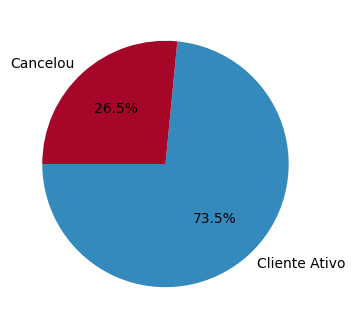

In [81]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('bmh')
plt.pie((dados_df['cancelou'].value_counts()), labels=['Cliente Ativo', 'Cancelou'], autopct='%1.1f%%', startangle=180)
plt.show()

### Análise de Variáveis Categóricas vs. Churn
Agora, vamos investigar como o churn se comporta em relação a categorias como tipo de contrato, parceiro, serviços adicionais, etc.

In [69]:
dados_df.columns

Index(['cancelou', 'genero', 'tempo_contrato_meses', 'tipo_contrato', 'idoso',
       'tem_conjuge', 'tem_dependentes', 'fatura_digital', 'forma_pagamento',
       'mensalidade', 'gasto_total', 'Contas_Diarias'],
      dtype='object')

In [76]:
categorias = ['forma_pagamento', 'tipo_contrato', 'fatura_digital', 'idoso', 'tem_conjuge', 'tem_dependentes']
titulos = ['Churn por Forma de Pagamento', 'Churn por Tipo de Contrato', 'Churn por Fatura Digital',
           'Churn por Idade', 'Churn por Estado Civil', 'Churn por Dependentes']

In [77]:
mapeamento_indices = {
    'forma_pagamento': ['Cartão de Crédito\n(Automático)', 'Cheque Correio', 'Cheque Eletrônico', 'Transferência\n(Automático)'],
    'fatura_digital': ['Fatura Física', 'Fatura Digital'],
    'idoso': ['Não Idoso', 'Idoso'],
    'tem_conjuge': ['Não tem cônjuge', 'Tem cônjuge'],
    'tem_dependentes': ['Não tem dependentes', 'Tem dependentes']
}

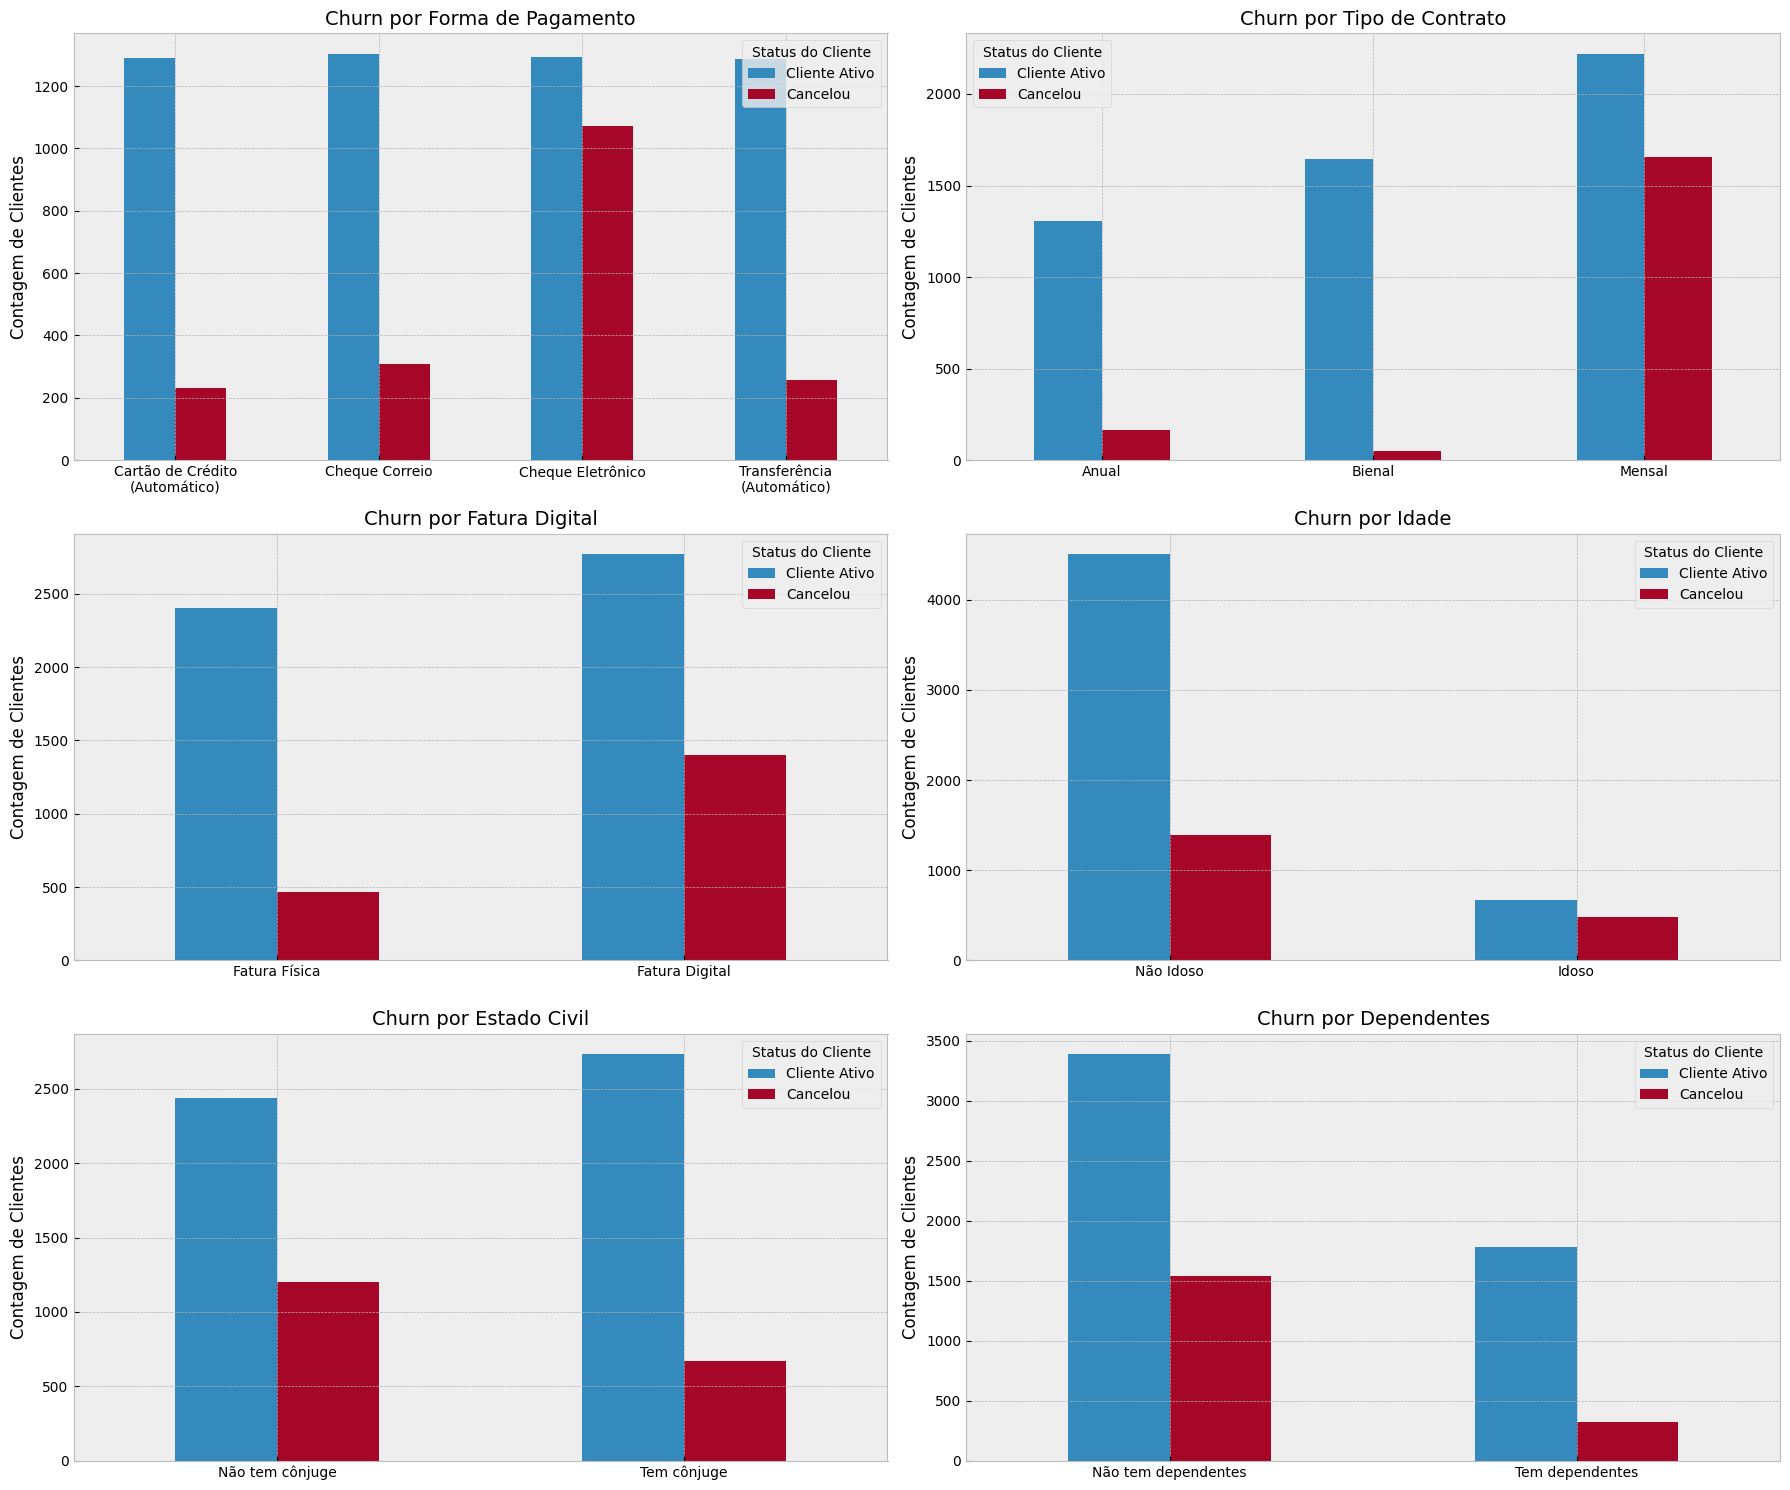

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
plt.style.use('bmh')

axes = axes.flatten()

for i, categoria in enumerate(categorias):
    tabela = pd.crosstab(dados_df[categoria], dados_df['cancelou'])

    if categoria in mapeamento_indices:
        tabela.index = mapeamento_indices[categoria]

    tabela.plot(kind='bar', rot=0, ax=axes[i])
    axes[i].set_title(titulos[i], fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0) # Reseta a rotação para 0
    axes[i].legend(title='Status do Cliente', labels=['Cliente Ativo', 'Cancelou'])
    axes[i].set_ylabel('Contagem de Clientes')

plt.tight_layout()
plt.show()

### Análise de variáveis numéricas

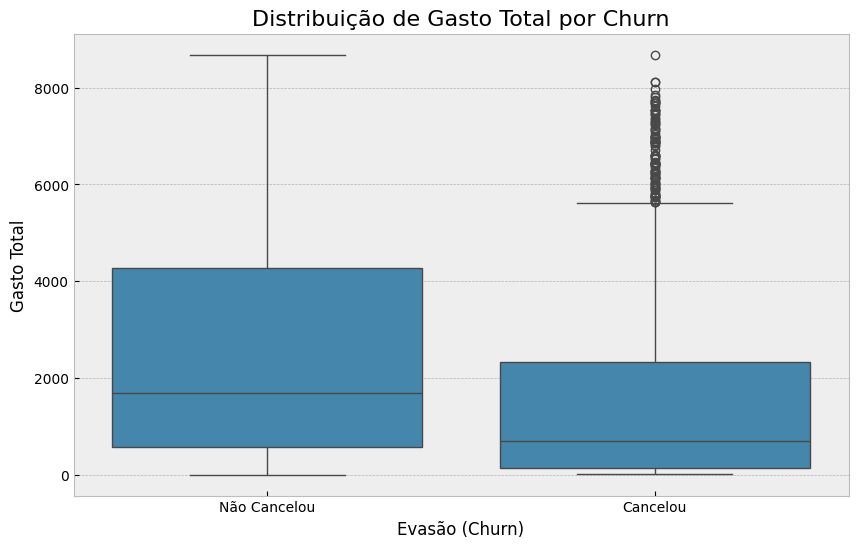

In [79]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cancelou', y='gasto_total', data=dados_df)

# Adiciona título e rótulos
plt.title('Distribuição de Gasto Total por Churn', fontsize=16)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])

plt.show()

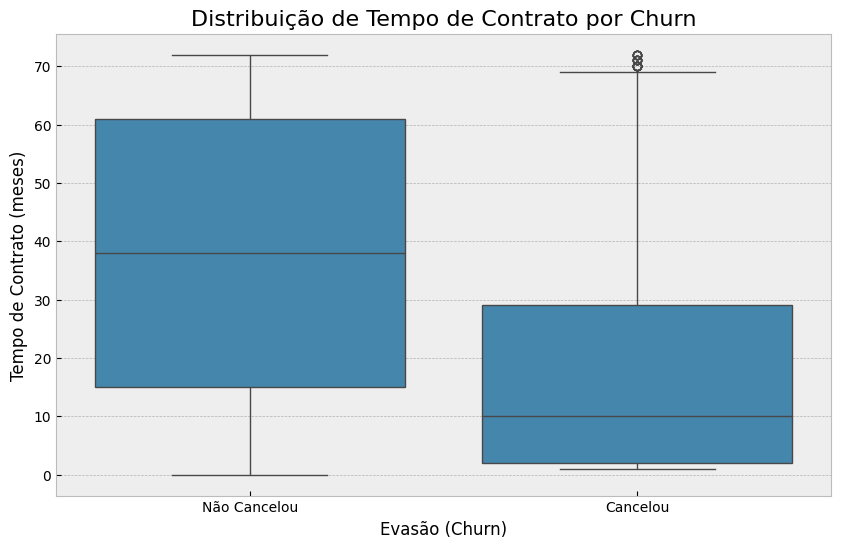

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancelou', y='tempo_contrato_meses', data=dados_df)

# Adiciona título e rótulos
plt.title('Distribuição de Tempo de Contrato por Churn', fontsize=16)
plt.xlabel('Evasão (Churn)', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])

plt.show()

#📄Relatorio Final

## Introdução
O presente relatório visa apresentar os resultados da análise exploratória de dados realizada para o projeto "Churn de Clientes" da Telecom X. O principal objetivo foi identificar e compreender os fatores que levam os clientes a cancelarem seus serviços, fornecendo insights valiosos para a equipe de Data Science e para a gestão da empresa, a fim de subsidiar o desenvolvimento de estratégias eficazes de retenção.

## 1.   Limpeza e Tratamento de Dados
A etapa de tratamento de dados foi crucial para garantir a qualidade e a confiabilidade da análise. Os seguintes passos foram realizados:

* **Importação**: Os dados foram importados de uma API e estruturados em um DataFrame utilizando a biblioteca pandas.

* **Tratamento de Valores Vazios:** Foi identificado que a coluna gasto_total continha valores de strings vazias (''). Como esses valores não são reconhecidos como nulos pelo pandas, eles foram substituídos por NaN (Not a Number) para permitir a manipulação adequada.

* **Conversão de Tipos:** Após o tratamento, a coluna gasto_total foi convertida para o tipo numérico (float), permitindo que as análises estatísticas e a criação de visualizaçõe*s fossem realizadas.

* **Criação de Nova Variável:** Para aprofundar a análise, a coluna Contas_Diarias foi criada, calculada pela divisão da mensalidade por 30.



## 2.   Análise Exploratória de Dados (EDA)
A análise exploratória foi dividida em três fases principais para extrair insights sobre o comportamento dos clientes.

**a) Distribuição Geral do Churn**

A análise inicial mostrou a proporção geral de clientes que cancelaram o serviço. A taxa de evasão (churn) foi identificada como um ponto de atenção, com uma porção significativa da base de clientes optando por cancelar a assinatura.

\

**b) Análise de Variáveis Categóricas vs. Churn**

O cruzamento da variável "cancelou" com as variáveis categóricas revelou padrões de comportamento claros:

* **Tipo de Contrato:** Conforme demonstrado no gráfico de barras, clientes com contratos mensais apresentam uma taxa de churn muito maior em comparação com aqueles que optam por contratos de um ou dois anos. Este é um dos fatores mais influentes na evasão.

* **Forma de Pagamento:** A análise indicou que as formas de pagamento Cheque Eletrônico e Cheque Correio estão fortemente associadas a uma maior taxa de cancelamento. Isso sugere que a fidelidade do cliente pode ser maior entre aqueles que utilizam formas de pagamento automáticas, como cartão de crédito e transferência bancária.

* **Outros Fatores:** A análise das colunas idoso, fatura_digital, tem_conjuge e tem_dependentes não mostrou uma relação tão forte com o churn quanto o tipo de contrato e a forma de pagamento, mas revelou algumas tendências secundárias que merecem atenção.

\

**c) Análise de Variáveis Numéricas vs. Churn**

A investigação das variáveis numéricas, utilizando boxplots, forneceu insights sobre a distribuição de valores entre os clientes que permaneceram e os que cancelaram.

* **Tempo de Contrato (tempo_contrato_meses)**: O boxplot de tempo de contrato demonstra que clientes que cancelaram têm um tempo de permanência significativamente menor do que os que permaneceram. A mediana do tempo de contrato para o grupo que cancelou é consideravelmente mais baixa, indicando que a maior parte da evasão ocorre nos estágios iniciais do relacionamento com o cliente.

* **Gasto Total (gasto_total):** A distribuição de gasto total também se diferencia entre os grupos. Clientes com menor gasto total ao longo do tempo apresentam uma maior tendência ao churn, o que pode indicar que o baixo engajamento financeiro está ligado a uma menor fidelização.

## 3. Conclusões e Recomendações
### **Conclusões Finais:**

A análise exploratória de dados identificou os principais fatores de risco para a evasão de clientes da Telecom X:

* **Tempo de Contrato Curto:** Clientes cancelam o serviço principalmente nos primeiros meses.

* **Tipo de Contrato Mensal:** A falta de um compromisso de longo prazo aumenta significativamente a probabilidade de churn.

* **Formas de Pagamento Específicas:** Métodos de pagamento não automáticos (Cheque Eletrônico e Cheque Correio) estão associados a uma maior taxa de evasão.

\

### **Recomendações Estratégicas:**

Com base nos insights obtidos, as seguintes ações são sugeridas para a Telecom X:

* **Estratégias de Retenção para Novos Clientes:** Concentrar esforços e recursos em programas de fidelização para clientes nos primeiros 6 meses de contrato, período em que a probabilidade de churn é mais alta.

* **Incentivo a Contratos de Longo Prazo:** Oferecer promoções e descontos atrativos para clientes com contrato mensal, incentivando-os a migrar para contratos de 1 ou 2 anos.

* **Foco na Migração de Pagamento:** Criar campanhas para incentivar clientes que pagam via cheque a adotarem métodos de pagamento automáticos, como cartão de crédito, o que pode aumentar a fidelidade.

* **Avançar para Modelos Preditivos:** Utilizar os fatores identificados (tipo de contrato, tempo de contrato, forma de pagamento) como variáveis-chave para o desenvolvimento de modelos de aprendizado de máquina, que possam prever quais clientes têm alto risco de churn.